# 7 Days of Code - Alura

#Importando bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateLocator
import json
import requests
import numpy as np

#Carregando os dados

In [ ]:
# Etapa de carregar os dados referentes aos emprestimos de exemplares nas bibliotecas da UFRN.
#Os dados foram enviados em arquivos separados, portanto cada um deles será carregado em um dataframe distinto.

dados_2010_1 = pd.read_csv('/content/emprestimos-20101.csv')
dados_2010_2 = pd.read_csv('/content/emprestimos-20102.csv')
dados_2011_1 = pd.read_csv('/content/emprestimos-20111.csv')
dados_2011_2 = pd.read_csv('/content/emprestimos-20112.csv')
dados_2012_1 = pd.read_csv('/content/emprestimos-20121.csv')
dados_2012_2 = pd.read_csv('/content/emprestimos-20122.csv')
dados_2013_1 = pd.read_csv('/content/emprestimos-20131.csv')
dados_2013_2 = pd.read_csv('/content/emprestimos-20132.csv')
dados_2014_1 = pd.read_csv('/content/emprestimos-20141.csv')
dados_2014_2 = pd.read_csv('/content/emprestimos-20142.csv')
dados_2015_1 = pd.read_csv('/content/emprestimos-20151.csv')
dados_2015_2 = pd.read_csv('/content/emprestimos-20152.csv')
dados_2016_1 = pd.read_csv('/content/emprestimos-20161.csv')
dados_2016_2 = pd.read_csv('/content/emprestimos-20162.csv')
dados_2017_1 = pd.read_csv('/content/emprestimos-20171.csv')
dados_2017_2 = pd.read_csv('/content/emprestimos-20172.csv')
dados_2018_1 = pd.read_csv('/content/emprestimos-20181.csv')
dados_2018_2 = pd.read_csv('/content/emprestimos-20182.csv')
dados_2019_1 = pd.read_csv('/content/emprestimos-20191.csv')
dados_2019_2 = pd.read_csv('/content/emprestimos-20192.csv')
dados_2020_1 = pd.read_csv('/content/emprestimos-20201.csv')

In [ ]:
#Importando os dados dos exemplares, também disponibilizado pela UFRN.

dados_exemplares = pd.read_parquet('/content/dados_exemplares.parquet')

Verificando se todos os dados possuem as mesmas colunas para então realizar o processo de concatenação dos dados. Para isso podemos utilizar o método da bibliteca pandas 'concat()', que apenas irá executar corretamente se todas as colunas forem iguais.

In [ ]:
# Para facilitar a unificação dos dados, inicialmente vamos declarar uma lista de dataframes.

lista_de_dados = [dados_2010_1, dados_2010_2, dados_2011_1, dados_2011_2, dados_2012_1, dados_2012_2, dados_2013_1, dados_2013_2,
                  dados_2014_1, dados_2014_2, dados_2015_1, dados_2015_2, dados_2016_1, dados_2016_2, dados_2017_1, dados_2017_2,
                  dados_2018_1, dados_2018_2, dados_2019_1, dados_2019_2, dados_2020_1]
# Em seguida, podemos adicionar esta lista de dataframes dentro da função concat da biblioteca pandas, para então gerar um único dataframe com todos os dados de emprestimos.

dados_emprestimos = pd.concat(lista_de_dados, ignore_index=True)
dados_emprestimos.head()   #verificar quais são as colunas e como os dados estão carregados.

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO


In [ ]:
# Verificando quantas entradas há em nosso dataframe.
dados_emprestimos.shape

(2258018, 7)

In [ ]:
# Verificando o tipo de dados de cada uma das colunas.
dados_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258018 entries, 0 to 2258017
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 120.6+ MB


Os dados de emprestimos 'raw' fornecidos para este desafio não estão limpos, sendo assim é necessário dar início ao processamento destes dados. Este processo seguirá as etapas abaixo:

* Verificar dados em duplicidade.
* Identificar elementos nulos.
* Identificar os tipos de entradas para cada coluna e se necessário alterá-los.



In [ ]:
# esta etapa tem a função de verificar se há dados duplicados no nosso dataframe.

dados_emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    2
2461099        2012008348     2016/06/27 20:35:46.855000000  2016/06/14 11:20:33.254000000  2016/07/11 14:37:29.000000000  2.015022e+09        ALUNO D

Como foi possível verificar acima, existem entradas nos dados de emprestimos que são duplicados, cuja contagem chega em 7. Sendo assim, precisamos remover os dados duplicado, para que as futuras análises sejam fiéis a realidade do sistema de bibliotecas aos quais os dados pertencem.

In [ ]:
# A biblioteca pandas possui um método que permite remover facilmente entradas duplicadas em nosso dataframe.
# O método em questão é o .drop_duplicate()

dados_emprestimos = dados_emprestimos.drop_duplicates()

In [ ]:
# Verificando se de fato os elementos duplicados foram removidos.

dados_emprestimos.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    1
2336122        2011033079     2016/11/21 02:01:58.488000000  2016/11/10 17:00:12.989000000  2016/12/02 14:21:49.000000000  2.016023e+09        ALUNO DE GRADUAÇÃO        1
2336103        2014085936     2016/11/25 19:25:36.215000000  2016/11/10 16:54:52.447000000  2016/12/13 14:30:52.000000000  2.014047e+09        ALUNO DE GRADUAÇÃO        1
2336104        2011027960     2016/11/23 17:27:54.642000000  2016/11/10 16:55:17.956000000  2016/11/28 10:32:38.000000000  2.016083e+09        ALUNO DE GRADUAÇÃO        1
2336105        2014000897     2016/12/02 15:02:53.356000000  2016/11/10 16:55:19.851000000  2016/12/23 13:53:23.000000000  2.014071e+09        ALUNO D

In [ ]:
# Após confirmar que não há mais dados duplicados, podemos ferificar se há dados nulos no nosso dataframe.
# Para isso, podemos utilizar os métodos da biblioteca pandas, isnull e sum(), para identificar elementos nulos e quantifica-los.

dados_emprestimos.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1285709
data_emprestimo               0
data_devolucao             6471
matricula_ou_siape         3170
tipo_vinculo_usuario          0
dtype: int64

As colunas data_renovação, data_devolução e matricula_ou_siape apresentam valores nulos.

Dentre estas, a única que potencialmente representa um problema para as análises que se seguirão é a matricula_ou_siape, sendo assim, os registros nulos associados a ela serão removidos.

A coluna data_renovação possui entradas nulas, pois nem todo emprestimo de livro implica na renovação do emprestimo.

A coluna data_devolução com valores nulos, em um primeiro momento pode levar a conclusão de ser uma entrada com erro, no entando há casos em que o usuário(a) retira um exemplar emprestado e não devolve no prazo e tão pouco realiza a renovação do emprestimo do mesmo.

In [ ]:
# Procedimento para identificar o index dos registro de matrícula_ou_siape.
# Após a identificação, iremos utilizar estes index para remover os registros correspondentes.

index_a_serem_removidos = dados_emprestimos[['matricula_ou_siape']].isnull().query('matricula_ou_siape == True').index
dados_emprestimos_V2 = dados_emprestimos.drop(index_a_serem_removidos)

In [ ]:
# Procedimento para confirmar se há valores nulos remanecentes na coluna matricula_ou_siape.
dados_emprestimos_V2[['matricula_ou_siape']].isnull().value_counts()

matricula_ou_siape
False                 2254811
dtype: int64

Após remover diversas entradas do nosso DataFrame, os números dos índice ficam despadronizados, o que pode levar a erros ou mau funcionamento de códigos. Portanto, é uma boa prática, re-iniciar a contagem do índice, utilizando o método da biblioteca pandas conhecido como reset_index().

Vale destacar que é necessário inserir o argumento drop = True para garantir que o índice original será descartado e substituído pelo novo índice.

In [ ]:
dados_emprestimos_V2.reset_index(drop = True, inplace = True)
dados_emprestimos_V2.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO


Agora que o dataframe esta corrigido, iremos ajustar os tipos de entradas para cada coluna.

In [ ]:
# A matricula_ou_siape esta com tipo de dado igual a float, e por isso temos uma visualização prejudicada destes valores.
# Não é esperado realizar nenhuma operação matemática com estes dados, pois ele são tratados como variáveis categóricas, portanto podemos mudar o seu tipo para str.

dados_emprestimos_V2[['matricula_ou_siape']] = dados_emprestimos_V2[['matricula_ou_siape']].astype(str)

In [ ]:
dados_emprestimos_V2.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971.0,ALUNO DE GRADUAÇÃO


Agora podemos seguir o mesmo procedimento de limpeza dos dados para o DataFrame dados_exemplares.

In [ ]:
dados_exemplares.head()

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


In [ ]:
dados_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


In [ ]:
dados_exemplares.isnull().sum()

id_exemplar         0
codigo_barras       0
colecao             0
biblioteca          0
status_material     0
localizacao         0
registro_sistema    0
dtype: int64

Como observado nos comandos acima, o DataFrame dados_exemplares, possui 7 colunas, 546237 registros e nanhum dado nulo. Contudo a contagem dos índices, não esta correta, então a proxima etapa consiste em re-iniciar a contagem do índice.

In [ ]:
dados_exemplares.reset_index(drop = True, inplace = True)
dados_exemplares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546237 entries, 0 to 546236
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 29.2+ MB


Após corrigir inconsistencias nos dos DataFrames desta análise, podemos mescla-los para facilitar futuras análises. Para isso podemos utilizar o comando da biblioteca pandas merge(), que trabalha de maneira semelhando ao JOIN do SQL. Este método vai estipular automaticamente ou não uma coluna de chave primária, neste caso a coluna código de barras, e adicionar os valores dos dois DataFrames que são correspondentes.

In [ ]:
dados_completos = dados_emprestimos_V2.merge(dados_exemplares)

In [ ]:
dados_completos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


In [ ]:
dados_completos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069629 entries, 0 to 2069628
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   id_emprestimo         int64 
 1   codigo_barras         object
 2   data_renovacao        object
 3   data_emprestimo       object
 4   data_devolucao        object
 5   matricula_ou_siape    object
 6   tipo_vinculo_usuario  object
 7   id_exemplar           int64 
 8   colecao               object
 9   biblioteca            object
 10  status_material       object
 11  localizacao           int64 
 12  registro_sistema      int64 
dtypes: int64(4), object(9)
memory usage: 221.1+ MB


Nos foi informado que os valores presentes na coluna localização, são referêntes ao gênero do exemplar. Portando vamos adicionar uma nova coluna que contenha de maneira evidente a qual gênero cada um dos exemplares pertence.


In [ ]:
Genero = []
for CDU in dados_completos['localizacao']:
  if CDU <= 99:
    Genero.append('Generalidades, Ciência e Conhecimento')
  elif CDU <= 199:
    Genero.append('Filosofia e Psicologia')
  elif CDU <= 299:
    Genero.append('Religião')
  elif CDU <= 399:
    Genero.append('Ciências Sociais')
  elif CDU <= 499:
    Genero.append('Classe vaga. Provisoriamente não ocupada')
  elif CDU <= 599:
    Genero.append('Matemática e Ciências naturais')
  elif CDU <= 699:
    Genero.append('Ciências Aplicadas')
  elif CDU <= 799:
    Genero.append('Belas Artes')
  elif CDU <= 899:
    Genero.append('Linguagem, Lingua, Linguistica')
  else:
    Genero.append('Geoografia, Biografia, História')

dados_completos['Genero'] = Genero

dados_completos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,Genero
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências Aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências Aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências Aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências Aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências Aplicadas


Para a nossa análise, a coluna registro_sistema não possui valor, portanto podemos excluí-la.

In [ ]:
dados_completos.drop(columns = ['registro_sistema'], axis = 1, inplace=True)

##Análise exploratória dos dados

Agora daremos início a análise exploratória dos nossos dados. Para tal, iremos verificar os seguintes pontos:

* Quantidade total de exemplares emprestados com relação ao ano.
* Média de emprestimos de exemplares ao longo dos meses.
* Média de emprestimos de exemplares ao longo do dia.

In [ ]:
# Inicialmente vamos criar um DataFrame que contém das datas em que foram realizados empréstimos e o número de emprestimos realizados.

data = pd.to_datetime(dados_completos['data_emprestimo'].unique())
numero = dados_completos['data_emprestimo'].value_counts().to_list()

exemplares_data = pd.DataFrame(
    {
    'data': data,
    'numero_exemplares_retirados' : numero
}
)
exemplares_data.head()

,data,numero_exemplares_retirados
0,2010-01-04 07:44:10.721,3
1,2010-03-01 12:40:56.212,3
2,2010-01-04 07:44:10.750,3
3,2010-02-11 11:16:30.335,3
4,2010-03-04 13:36:26.599,3


In [ ]:
# Criando diferentes DataFrames para trabalhar com únidades de tempo diferentes

exemplares_ano = exemplares_data.groupby(exemplares_data.data.dt.year).sum()


dicionario_mes = {
    1: 'Jan', 2:'Fev', 3:'Mar', 4:'Abr', 5:'Mai', 6:'Jun', 7:'Jul', 8:'Ago', 9:'Set', 10:'Out', 11:'Nov', 12:'Dez'
}

exemplares_mes = round((exemplares_data.groupby(exemplares_data.data.dt.month).sum())/len(exemplares_ano), 2)
exemplares_mes.index = exemplares_mes.index.map(dicionario_mes)
exemplares_mes.index.name = 'mes'


exemplares_hora = exemplares_data.groupby(exemplares_data.data.dt.hour).sum()/len(exemplares_data['data'].dt.date.unique())
exemplares_hora['hora'] = exemplares_hora.index
exemplares_hora = exemplares_hora.reindex(columns=['hora', 'numero_exemplares_retirados'])
exemplares_hora.reset_index(drop = True, inplace = True)


<ipython-input-26-a4873c370c54>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exemplares_ano = exemplares_data.groupby(exemplares_data.data.dt.year).sum()
<ipython-input-26-a4873c370c54>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exemplares_mes = round((exemplares_data.groupby(exemplares_data.data.dt.month).sum())/len(exemplares_ano), 2)
<ipython-input-26-a4873c370c54>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the func

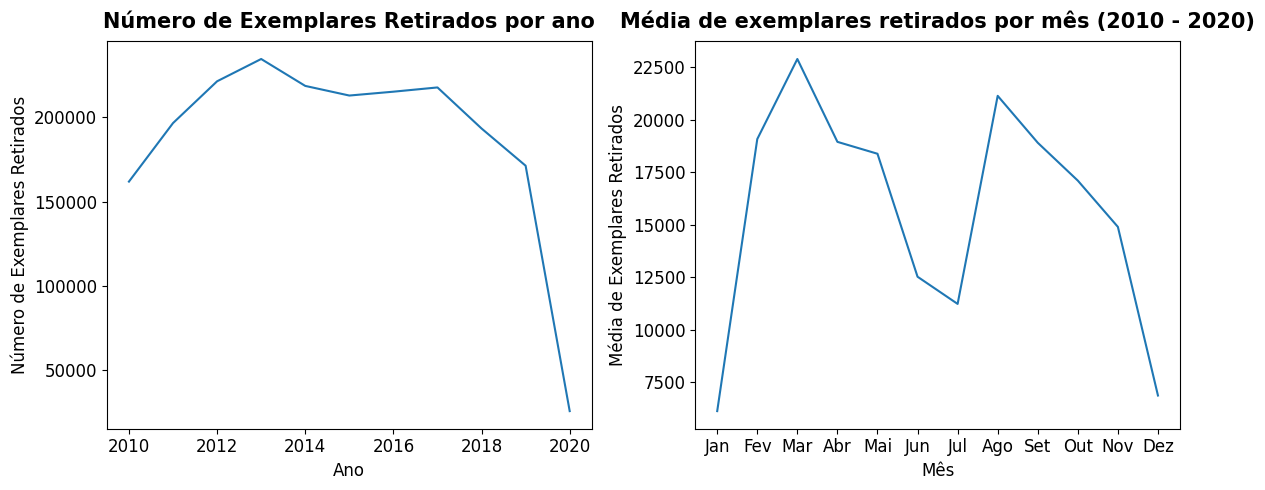

In [ ]:
# Criando um figura com dois gráficos referentes a dependencia do número de exemplares emprestados ao longo dos anos e meses.

fig = plt.figure(figsize=(12,5))

plt.subplot(1,2, 1)
ax = sns.lineplot(data = exemplares_ano, x = 'data', y = 'numero_exemplares_retirados')
ax.set_title('Número de Exemplares Retirados por ano', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('Número de Exemplares Retirados', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.subplot(1,2,2)
ax = sns.lineplot(data = exemplares_mes, x = 'mes', y = 'numero_exemplares_retirados')
ax.set_title('Média de exemplares retirados por mês (2010 - 2020)', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Mês', fontsize = 12)
ax.set_ylabel('Média de Exemplares Retirados', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

plt.tight_layout()
plt.show()

Quanto a primeira figura do número de exemplares emprestados ao longo dos anos, é possível notar claramente um aumento no número de volumes retidos entre os anos de 2010 e 2013 seguido por sucessivas queda nos anos seguintes, especialmente em 2020. A redução no número de retiradas da biblioteca pode ter ocorrido devido a maior presença de mídeas eletrônicas, como a popularização de e-books ou mesmo ao rico conteúdo disponível na internet que também é utilizado como fonte de consulta por alunor de gradução, pós-graduação e professores. o comportamento do ano de 2020 é atípico em relação aos anos anteriores devido a dois fatores fundamentais: os dados são apenas do primeiro semestre do ano e a pandemia de Covid-19 com as restrições sociais.

No tocante ao segundo gráfico, temos a média de retiradas de exemplares ao longo dos meses. O comportamento da curva é curioso, apresentando dois máximo, sendo o primeiro entre fevereiro e maio e o segundo entre agosto e novembro. Estes períodos tem em comum a típica duração do semestre acadêmcio, onde estudos, atividades e provas demandam de consultas a materiais bibliográficos.

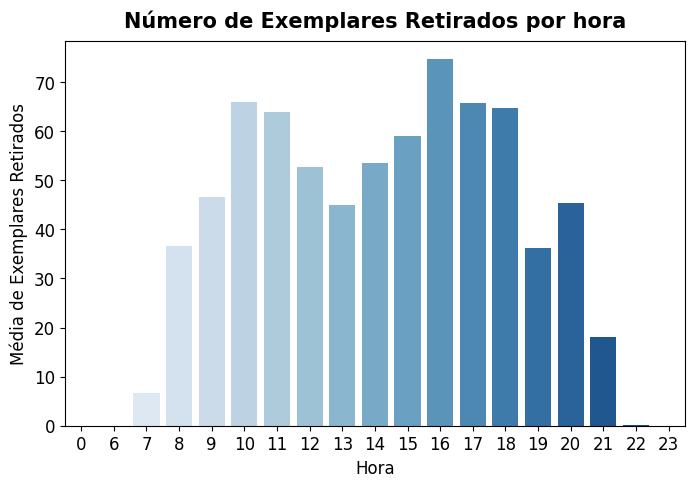

In [ ]:
# Figura contendo um gráfico de colunas que expressa a dependencia do número médio de empréstimo ao longo das horas do dia.

fig = plt.figure(figsize=(8,5))

ax = sns.barplot(data = exemplares_hora, x = 'hora', y = 'numero_exemplares_retirados', palette = "Blues")
ax.set_title('Número de Exemplares Retirados por hora', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Hora', fontsize = 12)
ax.set_ylabel('Média de Exemplares Retirados', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 12)
ax.yaxis.set_tick_params(labelsize = 12)

Por fim, a média de retiradas de livros ao longo do dia, apresenta picos de atividade às 10, 11 e 16 h. Sendo assim, uma estratégia pertinente que a gestão da biblioteca pode adotar é diponibilizar mais servidores para atuar no cadastro das retiradas nestes horários de pico.

Outra análise extremamente pertinente para este projeto é a dependencia do número de empréstimos por variáveis categóricas, como o tipo de vínculo dos usuários, coleção, biblioteca e gênero.

Iniciando nossa análise pela variável categórica tipo de usuário. Inicialmente precisamos determinar quais são as categorias disponíveis.

In [ ]:
dados_completos['tipo_vinculo_usuario'].unique()

array(['ALUNO DE GRADUAÇÃO', 'ALUNO DE PÓS-GRADUAÇÃO', 'DOCENTE',
       'DOCENTE EXTERNO', 'SERVIDOR TÉCNICO-ADMINISTRATIVO',
       'ALUNO MÉDIO/TÉCNICO', 'USUÁRIO EXTERNO'], dtype=object)

Como passo seguinte, vamos criar um novo DataFrame contendo apenas as informações pertinentes, a fim de organizar a nossa leitura de dados. O DataFrame em questão possui os tipos de usuários e sua representação em porcentagem no número de retirada de exemplares.


In [ ]:
emprestimos_por_tipo_usuario = pd.DataFrame(
    {
        'Tipo_usuario' : dados_completos['tipo_vinculo_usuario'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['tipo_vinculo_usuario'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_tipo_usuario

,Tipo_usuario,Percentual_emprestimo
0,ALUNO DE GRADUAÇÃO,77.899179
1,ALUNO DE PÓS-GRADUAÇÃO,14.613875
2,DOCENTE,3.427474
3,SERVIDOR TÉCNICO-ADMINISTRATIVO,1.546026
4,ALUNO MÉDIO/TÉCNICO,1.354301
5,DOCENTE EXTERNO,1.156826
6,USUÁRIO EXTERNO,0.002319


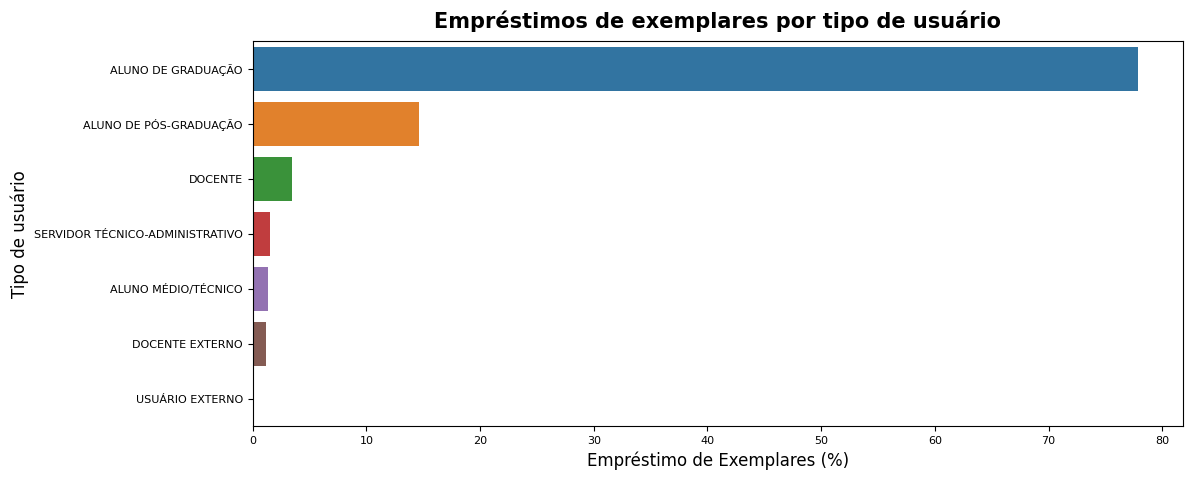

In [ ]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_tipo_usuario, y = 'Tipo_usuario', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por tipo de usuário', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Tipo de usuário', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

De acordo com as informação obtidas e expostas acima, é possível notar inequivocamente que os alunos (graduação e pós-graduação) representam cera de 92% de todas as retiradas das bibliotecas da UFRN, sendo este um comportamento muito coerente, haja vista que esta classe representa aqueles que estão em formação, logo necessitam de muitas fontes de pesquisa e consulta. Com 77% das retiradas, os alunos de graduação lideram como principais usuários da biblioteca. De fato, devido a matriz curricular dos cursos de graduação serem de conhecimentos bem estabelecidos, é possível encontra-los de maneira muito mais clara, robusta e didática em livros, principais referências bibliográficas presentes em bibliotecas.

A pós graduação, por se tratar essencialmente de pesquisa na fronteira do conhecimento, tem como principal fonte de consulta periódicos nacionais e internacionar, que são majoritariamente veiculados em meios eletrônicos. Pontualmente são utilizados como fonte de consultas livros presentes em bibliotecas, salvo casos em que os pesquisadores de pós-graduação participam de disciplinas ou cursos.

Por fim, os funcionários representam uma pequena parcela das retiradas das bibliotecas, pois com excessão dos docentes, estes não são obrigados a participar de atividades acadêmicas que necessitam de fontes de consultas bibliográficas.

A partir desta análise, é possível orientar a equipe de manutenção de livros a ter máximo cuidado com os livros utilizados por cursos de graduação, haja vista que estes são os mais utilizados e portanto os que mais sofrem desgastes. Além disso, a gestão da biblioteca a fim de manter o seu acervo relevante e atrativo, deve sempre que possível atender a solicitações de compras de livros especialmente aqueles direcionados para cursos de graduação.

In [ ]:
dados_completos['colecao'].unique()

array(['Acervo Circulante', 'Folhetos', 'Teses', 'Dissertações',
       'Monografias', 'Publicações de Autores do RN',
       'Publicações da UFRN', 'Multimeios', 'Coleção Mossoroense',
       'Eventos', 'Trabalho Acadêmico', 'Obras de Referência',
       'Obras Raras', 'Literatura de Cordel', 'Coleção Zila Mamede',
       'Necessidades Educacionais Específicas'], dtype=object)

In [ ]:
emprestimos_por_colecao = pd.DataFrame(
    {
        'Colecao' : dados_completos['colecao'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['colecao'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_colecao

,Colecao,Percentual_emprestimo
0,Acervo Circulante,99.062972
1,Multimeios,0.384175
2,Monografias,0.194286
3,Dissertações,0.116253
4,Obras de Referência,0.094365
5,Publicações de Autores do RN,0.041698
6,Publicações da UFRN,0.036867
7,Teses,0.034499
8,Folhetos,0.013046
9,Necessidades Educacionais Específicas,0.006281


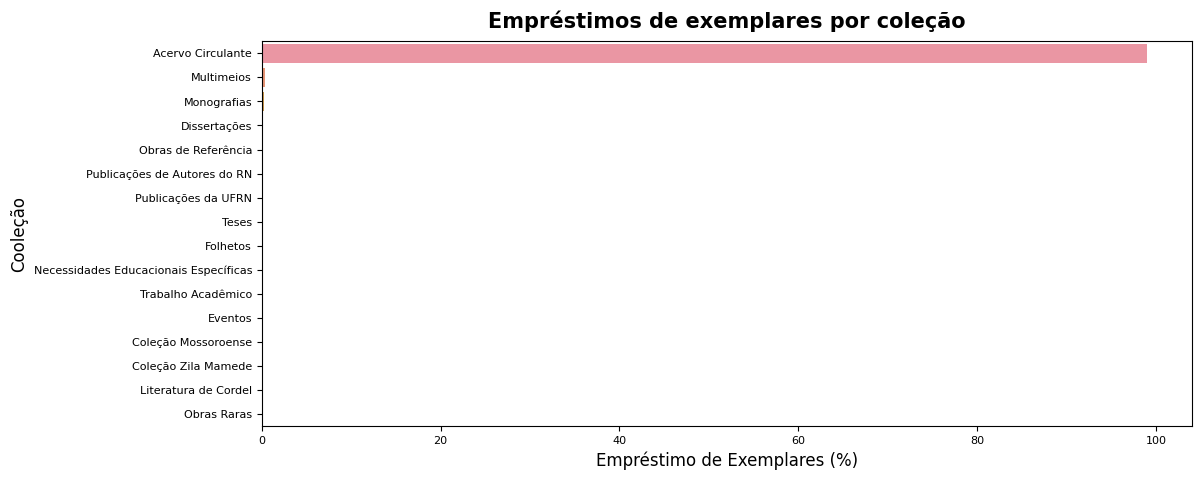

In [ ]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_colecao, y = 'Colecao', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por coleção', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Cooleção', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

Em conformidade com a análise anterior, o acervo circulante que representa os livros, representa cerca de 99 % das retiradas das bibliotecas. Ratificando o fato de que as bibliotecas da UFRN são utilizadas quase que exclusivamente para consulta de referências bibliográficas pertinentes para disciplinas, seja de graduação ou pós-graduação.  

In [ ]:
dados_completos['biblioteca'].unique()

array(['Biblioteca Central Zila Mamede',
       'Biblioteca Setorial Prof. Rodolfo Helinski - Escola Agrícola de Jundiaí - EAJ  - Macaiba',
       'Biblioteca Setorial Bertha Cruz Enders - \xadEscola de Saúde da UFRN - ESUFRN',
       'Biblioteca Setorial do Centro Ciências da Saúde - CCS',
       'Biblioteca Setorial Prof. Alberto Moreira Campos - \xadDepartamento de Odontologia',
       'Biblioteca Setorial Prof. Ronaldo Xavier de Arruda - CCET',
       'Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA',
       'Biblioteca Setorial Prof. Horácio Nicolas Solimo - \xad Engenharia Química - EQ - CT',
       'Biblioteca Setorial Prof. Francisco Gurgel De Azevedo - Instituto Química - IQ',
       'Biblioteca Setorial do Centro Ciências Sociais Aplicadas - CCSA',
       'Biblioteca Setorial do Departamento de Artes - DEART',
       'Biblioteca Setorial Prof. Dr. Marcelo Bezerra de Melo Tinôco - DARQ - \xadCT',
       'Biblioteca Setorial Árvore do Conhecimento - In

In [ ]:
emprestimos_por_biblioteca = pd.DataFrame(
    {
        'Biblioteca' : dados_completos['biblioteca'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['biblioteca'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_biblioteca

,Biblioteca,Percentual_emprestimo
0,Biblioteca Central Zila Mamede,68.879302
1,Biblioteca Setorial do Centro Ciências da Saúd...,5.730061
2,Biblioteca Setorial da Faculdade de Ciências d...,3.748595
3,Biblioteca Setorial Prof. Alberto Moreira Camp...,3.127710
4,Biblioteca Setorial Profª. Maria Lúcia da Cost...,2.954829
5,Biblioteca Setorial Bertha Cruz Enders - ­Esco...,2.223394
6,Biblioteca Setorial do Centro de Ciências Huma...,1.967019
7,Biblioteca Setorial Dr. Paulo Bezerra - EMCM/R...,1.550858
8,Biblioteca Setorial Profª. Maria José Mamede G...,1.405276
9,Biblioteca Setorial Prof. Rodolfo Helinski - E...,1.315067


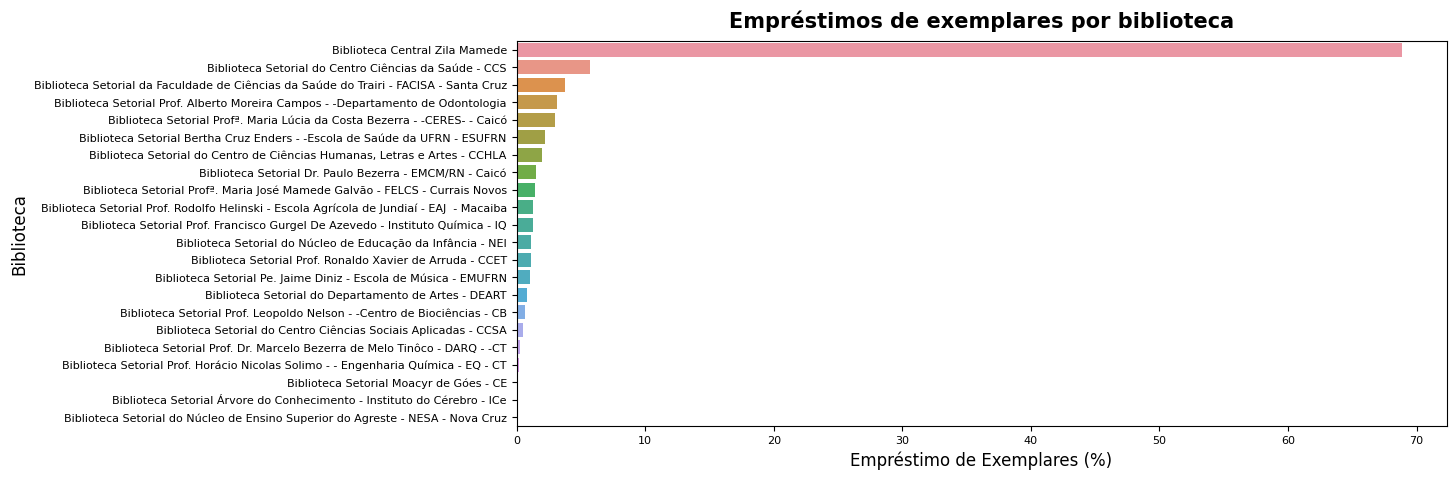

In [ ]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_biblioteca, y = 'Biblioteca', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por biblioteca', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Biblioteca', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

O uso das bibliotecas é dependente de diversos fatores, como números de alunos que possuem acesso a cada unidade, especialização de temas de cada unidade e tamanho do acervo. Nesta perspectiva, naturalmente a biblioteca central terá o maior acervo e também o maior número de usuários, refletindo no número de retirada de exemplares, conforme elucidade acima.

Sendo assim, a gestão das bibliotecas da UFRN deve levar em conta o volume de emprestimos em cada biblioteca, para distribuir de maneira eficiente o número de servidores em cada unidade.

In [ ]:
dados_completos['Genero'].unique()

array(['Ciências Aplicadas', 'Linguagem, Lingua, Linguistica',
       'Ciências Sociais', 'Geoografia, Biografia, História',
       'Matemática e Ciências naturais', 'Religião',
       'Generalidades, Ciência e Conhecimento', 'Filosofia e Psicologia',
       'Belas Artes'], dtype=object)

In [ ]:
emprestimos_por_genero = pd.DataFrame(
    {
        'Genero' : dados_completos['Genero'].value_counts().index,
        'Percentual_emprestimo' : (dados_completos['Genero'].value_counts(normalize = True) * 100).to_list()
    }
)

emprestimos_por_genero

,Genero,Percentual_emprestimo
0,Ciências Aplicadas,68.803781
1,Ciências Sociais,17.821648
2,Matemática e Ciências naturais,3.315135
3,"Generalidades, Ciência e Conhecimento",3.013487
4,Religião,2.997977
5,Filosofia e Psicologia,2.918881
6,"Geoografia, Biografia, História",0.385673
7,Belas Artes,0.381904
8,"Linguagem, Lingua, Linguistica",0.361514


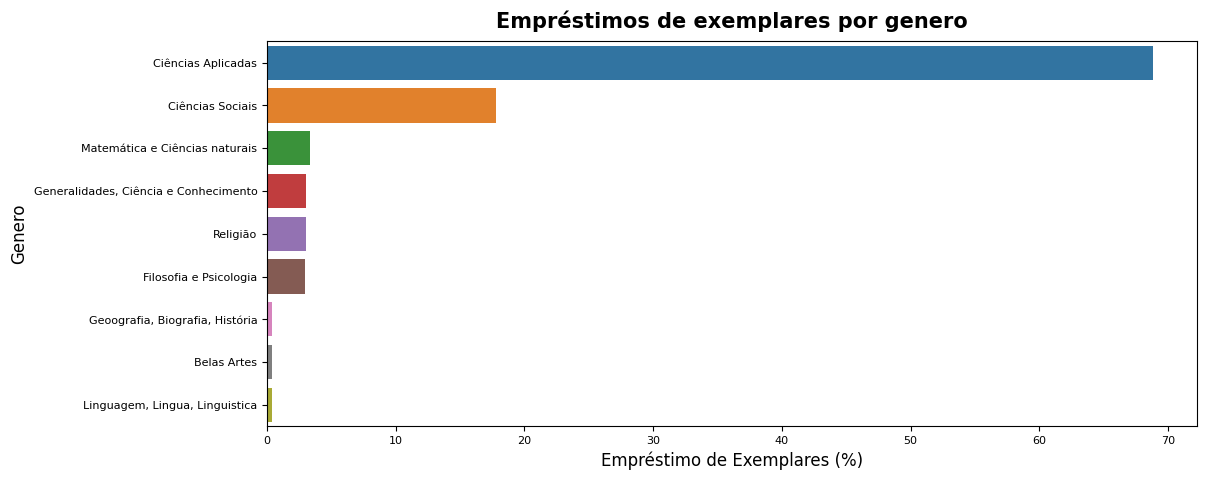

In [ ]:
fig = plt.figure(figsize = (12, 5))

ax = sns.barplot(data = emprestimos_por_genero, y = 'Genero', x = 'Percentual_emprestimo')
ax.set_title('Empréstimos de exemplares por genero', fontsize = 15, fontweight = 'bold', pad = 10)
ax.set_ylabel('Genero', fontsize = 12)
ax.set_xlabel('Empréstimo de Exemplares (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 8)
ax.xaxis.set_tick_params(labelsize = 8)

plt.show()

Por fim o gênero mais requisitado nas bibliotecas da UFRN é o de Ciências Aplicadas. Contudo este indicador pode ser fortemente enviezado pelo número de alunos de cada curso de graduação. Sendo assim, para uma análise mais robusta, seria necessário normalizar estes dados pelo número de alunos de cada curso.

In [ ]:
dados_completos.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,Genero
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências Aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências Aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências Aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências Aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências Aplicadas


In [ ]:
retiradas_alunos = dados_completos.query('tipo_vinculo_usuario in ["ALUNO DE GRADUAÇÃO", "ALUNO DE PÓS-GRADUAÇÃO"]')
retiradas_alunos = retiradas_alunos[['data_devolucao', 'tipo_vinculo_usuario']]
retiradas_alunos['data_devolucao'] = pd.to_datetime(retiradas_alunos['data_devolucao'])
retiradas_alunos['data_devolucao'] = retiradas_alunos['data_devolucao'].dt.year
retiradas_alunos = retiradas_alunos.groupby(['data_devolucao', 'tipo_vinculo_usuario']).size().reset_index(name = 'numero_de_retiradas')
retiradas_alunos

,data_devolucao,tipo_vinculo_usuario,numero_de_retiradas
0,2010.0,ALUNO DE GRADUAÇÃO,124383
1,2010.0,ALUNO DE PÓS-GRADUAÇÃO,22996
2,2011.0,ALUNO DE GRADUAÇÃO,157758
3,2011.0,ALUNO DE PÓS-GRADUAÇÃO,25067
4,2012.0,ALUNO DE GRADUAÇÃO,178808
5,2012.0,ALUNO DE PÓS-GRADUAÇÃO,28755
6,2013.0,ALUNO DE GRADUAÇÃO,187739
7,2013.0,ALUNO DE PÓS-GRADUAÇÃO,31898
8,2014.0,ALUNO DE GRADUAÇÃO,172384
9,2014.0,ALUNO DE PÓS-GRADUAÇÃO,33147


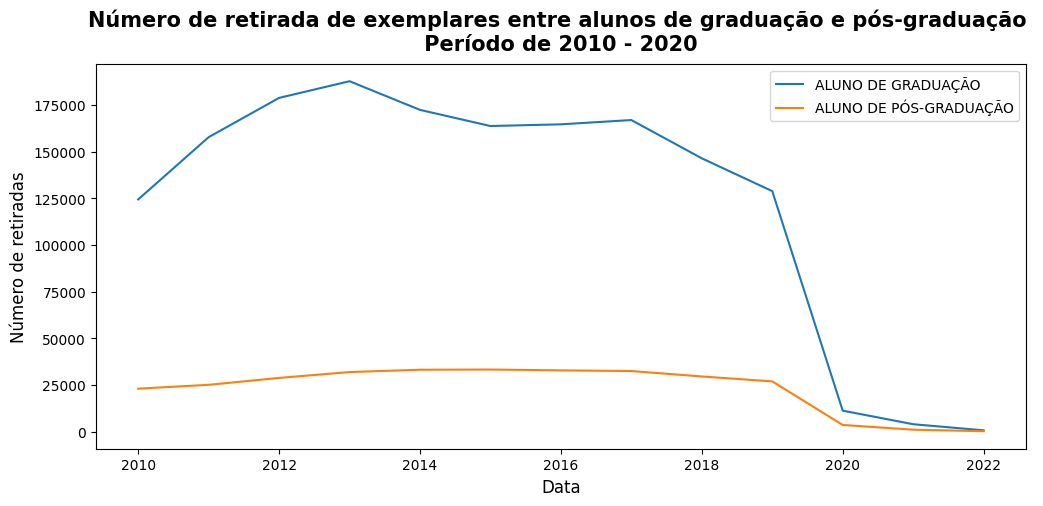

In [ ]:
fig = plt.figure(figsize = (12,5))

ax = sns.lineplot(data = retiradas_alunos, x = 'data_devolucao', y = 'numero_de_retiradas', hue = 'tipo_vinculo_usuario')
ax.set_title('Número de retirada de exemplares entre alunos de graduação e pós-graduação \n Período de 2010 - 2020 ', fontsize =15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Data', fontsize = 12)
ax.set_ylabel('Número de retiradas', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.yaxis.set_tick_params(labelsize = 10)

plt.legend(fontsize = 10)

In [ ]:
#nova consulta para construção dos box plots
retiradas_alunos = dados_completos.query('tipo_vinculo_usuario in ["ALUNO DE GRADUAÇÃO", "ALUNO DE PÓS-GRADUAÇÃO"]')
retiradas_alunos = retiradas_alunos[['data_devolucao', 'tipo_vinculo_usuario']]
retiradas_alunos['data_devolucao'] = pd.to_datetime(retiradas_alunos['data_devolucao'])
retiradas_alunos['ano'] = retiradas_alunos['data_devolucao'].dt.year
retiradas_alunos['mes'] = retiradas_alunos['data_devolucao'].dt.month
retiradas_alunos = retiradas_alunos.drop(columns = 'data_devolucao').reset_index(drop = True)
retiradas_alunos = retiradas_alunos.groupby(['ano', 'mes', 'tipo_vinculo_usuario']).size().reset_index(name = 'numero_de_retiradas')
retiradas_alunos

,ano,mes,tipo_vinculo_usuario,numero_de_retiradas
0,2010.0,1.0,ALUNO DE GRADUAÇÃO,685
1,2010.0,1.0,ALUNO DE PÓS-GRADUAÇÃO,204
2,2010.0,2.0,ALUNO DE GRADUAÇÃO,3503
3,2010.0,2.0,ALUNO DE PÓS-GRADUAÇÃO,943
4,2010.0,3.0,ALUNO DE GRADUAÇÃO,13012
...,...,...,...,...
290,2022.0,2.0,ALUNO DE GRADUAÇÃO,357
291,2022.0,2.0,ALUNO DE PÓS-GRADUAÇÃO,70
292,2022.0,3.0,ALUNO DE GRADUAÇÃO,167
293,2022.0,3.0,ALUNO DE PÓS-GRADUAÇÃO,66


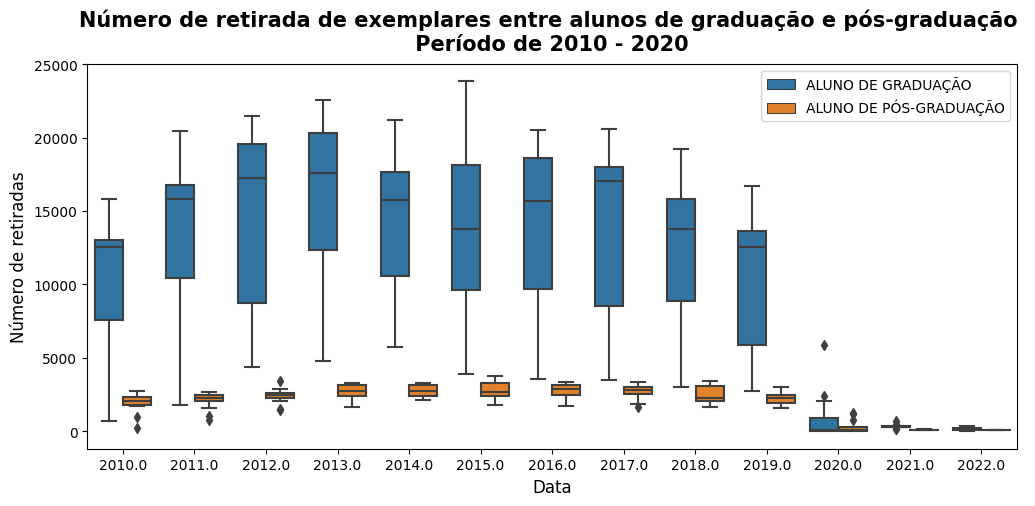

In [ ]:
fig = plt.figure(figsize = (12,5))

ax = sns.boxplot(data = retiradas_alunos, x = 'ano', y = 'numero_de_retiradas', hue = 'tipo_vinculo_usuario')
ax.set_title('Número de retirada de exemplares entre alunos de graduação e pós-graduação \n Período de 2010 - 2020 ', fontsize =15, fontweight = 'bold', pad = 10)
ax.set_xlabel('Data', fontsize = 12)
ax.set_ylabel('Número de retiradas', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.yaxis.set_tick_params(labelsize = 10)

plt.legend(fontsize = 10)

In [ ]:
alunos_ate_2010 = pd.read_excel('/content/matricula_alunos.xlsx', skiprows=1)
alunos_ate_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
alunos_apos_2010 = pd.read_excel('/content/matricula_alunos.xlsx', sheet_name = 'Após 2010', skiprows=1)
alunos_apos_2010.columns = ['matricula_ou_siape', 'tipo_vinculo_usuario', 'curso']
alunos = pd.concat([alunos_ate_2010, alunos_apos_2010], ignore_index = True)
alunos.tipo_vinculo_usuario.unique()

array(['ALUNO DE GRADUAÇÃO'], dtype=object)

In [ ]:
df2 = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsmi=270881120&_hsenc=p2ANqtz-8T21u8xYdoT8xQ3CukH1KHRK1NNchPaYuv7xkaSvRaMumpAEjEoc4xWWNnm-ayPHV0M9JK9hdidc6xfFojnxirbq063A&utm_content=270881120&utm_source=hs_automation')
graduacao = pd.read_json(df2.registros[0])
alunos = pd.concat([alunos, graduacao], ignore_index=True)
alunos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,1.900017e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,1.990145e+08,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,1.997357e+08,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,1.998124e+08,ALUNO DE GRADUAÇÃO,LETRAS
4,1.998237e+08,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,2.020004e+10,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,2.020013e+10,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,2.020001e+10,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [ ]:
alunos['matricula_ou_siape'] = alunos['matricula_ou_siape'].astype('str')
alunos

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,190001688.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
1,199014489.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS BIOLÓGICAS
2,199735674.0,ALUNO DE GRADUAÇÃO,MATEMÁTICA
3,199812431.0,ALUNO DE GRADUAÇÃO,LETRAS
4,199823670.0,ALUNO DE GRADUAÇÃO,ECOLOGIA
...,...,...,...
72797,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
72798,20200039601.0,ALUNO DE GRADUAÇÃO,ENGENHARIA FLORESTAL
72799,20200132517.0,ALUNO DE GRADUAÇÃO,AGRONOMIA
72800,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [ ]:
alunos_avalaliacao = alunos.query('curso in ["BIBLIOTECONOMIA", "CIÊNCIAS SOCIAIS", "COMUNICAÇÃO SOCIAL", "DIREITO", "FILOSOFIA", "PEDAGOGIA"]')
alunos_avalaliacao.reset_index(drop = True)

,matricula_ou_siape,tipo_vinculo_usuario,curso
0,200031011.0,ALUNO DE GRADUAÇÃO,DIREITO
1,200045080.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
2,200115053.0,ALUNO DE GRADUAÇÃO,CIÊNCIAS SOCIAIS
3,200123382.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
4,200123730.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
...,...,...,...
18828,20200097481.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
18829,20200107087.0,ALUNO DE GRADUAÇÃO,PEDAGOGIA
18830,20200012706.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA
18831,20200009344.0,ALUNO DE GRADUAÇÃO,BIBLIOTECONOMIA


In [ ]:
emprestimo_avaliacao = dados_completos.query("tipo_vinculo_usuario == 'ALUNO DE GRADUAÇÃO'")
emprestimo_avaliacao = emprestimo_avaliacao[['tipo_vinculo_usuario', 'data_emprestimo', 'matricula_ou_siape']]
emprestimo_avaliacao['data_emprestimo'] = pd.to_datetime(emprestimo_avaliacao['data_emprestimo']).dt.year
emprestimo_avaliacao = emprestimo_avaliacao.merge(alunos_avalaliacao)
emprestimo_avaliacao = emprestimo_avaliacao.query('data_emprestimo >= 2015')
emprestimo_avaliacao.drop(columns = ['matricula_ou_siape', 'tipo_vinculo_usuario'], inplace = True)

In [ ]:
emprestimos_por_curso = emprestimo_avaliacao.groupby(['data_emprestimo', 'curso']).value_counts().reset_index()
emprestimos_por_curso.columns = ['ano', 'curso', 'numero_emprestimos']


In [ ]:
emprestimos_por_curso = emprestimos_por_curso.pivot_table(index = 'curso',
                                                          columns = 'ano',
                                                          values = 'numero_emprestimos',
                                                          margins = True,
                                                          margins_name = 'Total',
                                                          aggfunc = 'sum')

emprestimos_por_curso

ano,2015,2016,2017,2018,2019,2020,Total
curso,,,,,,,
BIBLIOTECONOMIA,7784,7044,7307,6378,5889,900,35302
CIÊNCIAS SOCIAIS,7489,6978,6918,6181,5788,825,34179
COMUNICAÇÃO SOCIAL,7147,7973,8253,6953,5885,796,37007
DIREITO,7665,7363,7885,7027,5861,905,36706
FILOSOFIA,6950,7576,7389,6296,5572,832,34615
PEDAGOGIA,7189,7153,7434,6518,5869,866,35029
Total,44224,44087,45186,39353,34864,5124,212838


In [ ]:
df2 = pd.read_json('https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_6-Novos_dados_novas_analises/Datasets/cadastro_alunos.json?utm_medium=email&_hsmi=270881120&_hsenc=p2ANqtz-8T21u8xYdoT8xQ3CukH1KHRK1NNchPaYuv7xkaSvRaMumpAEjEoc4xWWNnm-ayPHV0M9JK9hdidc6xfFojnxirbq063A&utm_content=270881120&utm_source=hs_automation')
pos_graduacao = pd.read_json(df2.registros[1])
pos_graduacao.drop(columns = 'tipo_vinculo_usuario', inplace = True)
pos_graduacao['matricula_ou_siape'] = pos_graduacao['matricula_ou_siape'].astype('float')
pos_graduacao['matricula_ou_siape'] = pos_graduacao['matricula_ou_siape'].astype('float')['matricula_ou_siape'] = pos_graduacao['matricula_ou_siape'].astype('str')
pos_graduacao

,matricula_ou_siape,curso
0,2008112114.0,CIÊNCIAS ODONTOLÓGICAS
1,2008106583.0,ENGENHARIA DE SOFTWARE
2,2011101417.0,ARQUITETURA E URBANISMO
3,2011113122.0,FILOSOFIA
4,2010110903.0,ARTES CÊNICAS
...,...,...
19435,20201013501.0,GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO
19436,20201014062.0,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO"
19437,20201017690.0,CIÊNCIAS DA SAÚDE
19438,20201014465.0,DESIGN


In [ ]:
emprestimos_pos_graduacao = dados_completos.query('tipo_vinculo_usuario == "ALUNO DE PÓS-GRADUAÇÃO"')
emprestimos_pos_graduacao = emprestimos_pos_graduacao[['data_emprestimo', 'matricula_ou_siape']]
emprestimos_pos_graduacao = emprestimos_pos_graduacao.merge(pos_graduacao)
emprestimos_pos_graduacao['data_emprestimo'] = pd.to_datetime(emprestimos_pos_graduacao['data_emprestimo']).dt.year
emprestimos_pos_graduacao.drop(columns = 'matricula_ou_siape', inplace=True)
emprestimos_pos_graduacao = emprestimos_pos_graduacao.query('data_emprestimo >= 2017')
emprestimos_pos_graduacao = emprestimos_pos_graduacao.groupby(['data_emprestimo', 'curso']).value_counts().reset_index()
emprestimos_pos_graduacao.columns = ['ano', 'curso', 'numero_de_emprestimos']
emprestimos_pos_graduacao.head()

,ano,curso,numero_de_emprestimos
0,2017,ADMINISTRAÇÃO,2538
1,2017,ARQUITETURA E URBANISMO,2209
2,2017,ARTES CÊNICAS,2115
3,2017,BIOINFORMÁTICA,2190
4,2017,BIOQUÍMICA,2294


In [ ]:
emprestimos_pos_graduacao['curso'].unique()

array(['ADMINISTRAÇÃO', 'ARQUITETURA E URBANISMO', 'ARTES CÊNICAS',
       'BIOINFORMÁTICA', 'BIOQUÍMICA',
       'CIÊNCIA E ENGENHARIA DE MATERIAIS',
       'CIÊNCIA, TECNOLOGIA E INOVAÇÃO', 'CIÊNCIAS DA SAÚDE',
       'CIÊNCIAS ODONTOLÓGICAS', 'DESIGN', 'ENGENHARIA CIVIL',
       'ENGENHARIA DE SOFTWARE', 'FILOSOFIA',
       'GESTÃO DA INFORMAÇÃO E DO CONHECIMENTO'], dtype=object)

In [ ]:
previsão = pd.DataFrame(
    {
        'ano': np.full(14, 2022),
        'curso' : emprestimos_pos_graduacao['curso'].unique(),
        'numero_de_emprestimos' : [1905, 1896, 1920, 2302, 2090, 2010, 1960, 1730, 2405, 1900, 1920, 1890, 1903, 1855]
    }
)
previsão

,ano,curso,numero_de_emprestimos
0,2022,ADMINISTRAÇÃO,1905
1,2022,ARQUITETURA E URBANISMO,1896
2,2022,ARTES CÊNICAS,1920
3,2022,BIOINFORMÁTICA,2302
4,2022,BIOQUÍMICA,2090
5,2022,CIÊNCIA E ENGENHARIA DE MATERIAIS,2010
6,2022,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",1960
7,2022,CIÊNCIAS DA SAÚDE,1730
8,2022,CIÊNCIAS ODONTOLÓGICAS,2405
9,2022,DESIGN,1900


In [ ]:
evolucao_emprestimos_pos_atual_previsto = pd.concat([previsão, emprestimos_pos_graduacao], ignore_index = True)
evolucao_emprestimos_pos_atual_previsto

,ano,curso,numero_de_emprestimos
0,2022,ADMINISTRAÇÃO,1905
1,2022,ARQUITETURA E URBANISMO,1896
2,2022,ARTES CÊNICAS,1920
3,2022,BIOINFORMÁTICA,2302
4,2022,BIOQUÍMICA,2090
...,...,...,...
65,2020,DESIGN,254
66,2020,ENGENHARIA CIVIL,254
67,2020,ENGENHARIA DE SOFTWARE,264
68,2020,FILOSOFIA,302


In [ ]:
def deferenca_retiradas(ano1, ano2):
  lista = []
  for i in evolucao_emprestimos_pos_atual_previsto['curso'].unique():
    x = evolucao_emprestimos_pos_atual_previsto.query(f'curso == "{i}" and ano == {ano1}')['numero_de_emprestimos'].iloc[0]
    y = evolucao_emprestimos_pos_atual_previsto.query(f'curso == "{i}" and ano == {ano2}')['numero_de_emprestimos'].iloc[0]
    resultado = round(((y/x)- 1) * 100, 2)
    lista.append(resultado)
  return lista

In [ ]:
diferenca_2017_2018 = deferenca_retiradas(2017, 2018)
diferenca_2018_2019 = deferenca_retiradas(2018, 2019)
diferenca_2019_2022= deferenca_retiradas(2019, 2022)

In [ ]:
variacao_emprestimos_pos_atual_previsto = pd.DataFrame(
    {
        'curso' : evolucao_emprestimos_pos_atual_previsto['curso'].unique(),
        '2017-2018' : diferenca_2017_2018,
        '2018-2019' : diferenca_2018_2019,
        '2019-2022' : diferenca_2019_2022
    }
)

variacao_emprestimos_pos_atual_previsto

In [ ]:
def color_negative(v, color):
    return f"color: {color};" if v < 0 else None

variacao_emprestimos_pos_atual_previsto.style.applymap(color_negative, subset=['2017-2018', '2018-2019', '2019-2022'], color='red')


,curso,2017-2018,2018-2019,2019-2022
0,ADMINISTRAÇÃO,-8.750000,-26.940000,12.590000
1,ARQUITETURA E URBANISMO,-13.220000,-5.160000,4.290000
2,ARTES CÊNICAS,-1.560000,-12.970000,5.960000
3,BIOINFORMÁTICA,-12.600000,-4.650000,26.140000
4,BIOQUÍMICA,-15.260000,5.810000,1.600000
5,CIÊNCIA E ENGENHARIA DE MATERIAIS,-8.890000,-4.830000,0.100000
6,"CIÊNCIA, TECNOLOGIA E INOVAÇÃO",-2.070000,-14.330000,-3.260000
7,CIÊNCIAS DA SAÚDE,-18.410000,-8.110000,-5.210000
8,CIÊNCIAS ODONTOLÓGICAS,5.220000,-15.980000,12.700000
9,DESIGN,-19.100000,0.160000,3.200000
